In [15]:
import pandas as pd

In [16]:
#carregando dataset
df = pd.read_csv("C:/Users/carlo/OneDrive/Documentos/DATA CASES/Analise-Prod-Agricola-India/crop_production.csv")

#exibindo as primeiras linhas do dataset
print(df.head())

                    State_Name District_Name  Crop_Year       Season  \
0  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
1  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
2  Andaman and Nicobar Islands      NICOBARS       2000  Kharif        
3  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    
4  Andaman and Nicobar Islands      NICOBARS       2000  Whole Year    

                  Crop    Area  Production  
0             Arecanut  1254.0      2000.0  
1  Other Kharif pulses     2.0         1.0  
2                 Rice   102.0       321.0  
3               Banana   176.0       641.0  
4            Cashewnut   720.0       165.0  


In [17]:
#colunas e tipos de dados
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246091 entries, 0 to 246090
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   State_Name     246091 non-null  object 
 1   District_Name  246091 non-null  object 
 2   Crop_Year      246091 non-null  int64  
 3   Season         246091 non-null  object 
 4   Crop           246091 non-null  object 
 5   Area           246091 non-null  float64
 6   Production     242361 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 13.1+ MB
None


In [18]:
#exibe estatísticas descritivas
print(df.describe())

           Crop_Year          Area    Production
count  246091.000000  2.460910e+05  2.423610e+05
mean     2005.643018  1.200282e+04  5.825034e+05
std         4.952164  5.052340e+04  1.706581e+07
min      1997.000000  4.000000e-02  0.000000e+00
25%      2002.000000  8.000000e+01  8.800000e+01
50%      2006.000000  5.820000e+02  7.290000e+02
75%      2010.000000  4.392000e+03  7.023000e+03
max      2015.000000  8.580100e+06  1.250800e+09


In [19]:
#limpeza de dados
#verificar se há valores nulos
print(df.isnull().sum())

State_Name          0
District_Name       0
Crop_Year           0
Season              0
Crop                0
Area                0
Production       3730
dtype: int64


In [20]:
#removendo os valores nulos
df.dropna()


,State_Name,District_Name,Crop_Year,Season,Crop,Area,Production
0,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Arecanut,1254.0,2000.0
1,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Other Kharif pulses,2.0,1.0
2,Andaman and Nicobar Islands,NICOBARS,2000,Kharif,Rice,102.0,321.0
3,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Banana,176.0,641.0
4,Andaman and Nicobar Islands,NICOBARS,2000,Whole Year,Cashewnut,720.0,165.0
...,...,...,...,...,...,...,...
246086,West Bengal,PURULIA,2014,Summer,Rice,306.0,801.0
246087,West Bengal,PURULIA,2014,Summer,Sesamum,627.0,463.0
246088,West Bengal,PURULIA,2014,Whole Year,Sugarcane,324.0,16250.0
246089,West Bengal,PURULIA,2014,Winter,Rice,279151.0,597899.0


In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

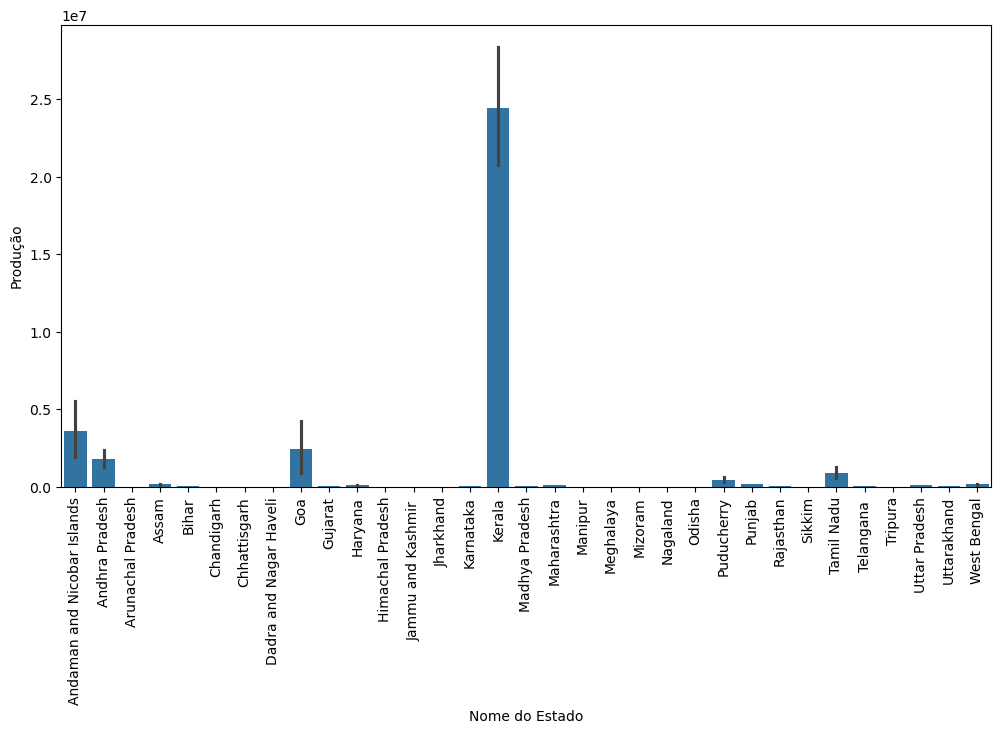

In [23]:
#plotando produção por estado
plt.figure(figsize=(12,6))
sns.barplot(x='State_Name', y='Production', data=df)
plt.xticks(rotation=90)
plt.xlabel('Nome do Estado')
plt.ylabel('Produção')
plt.show()

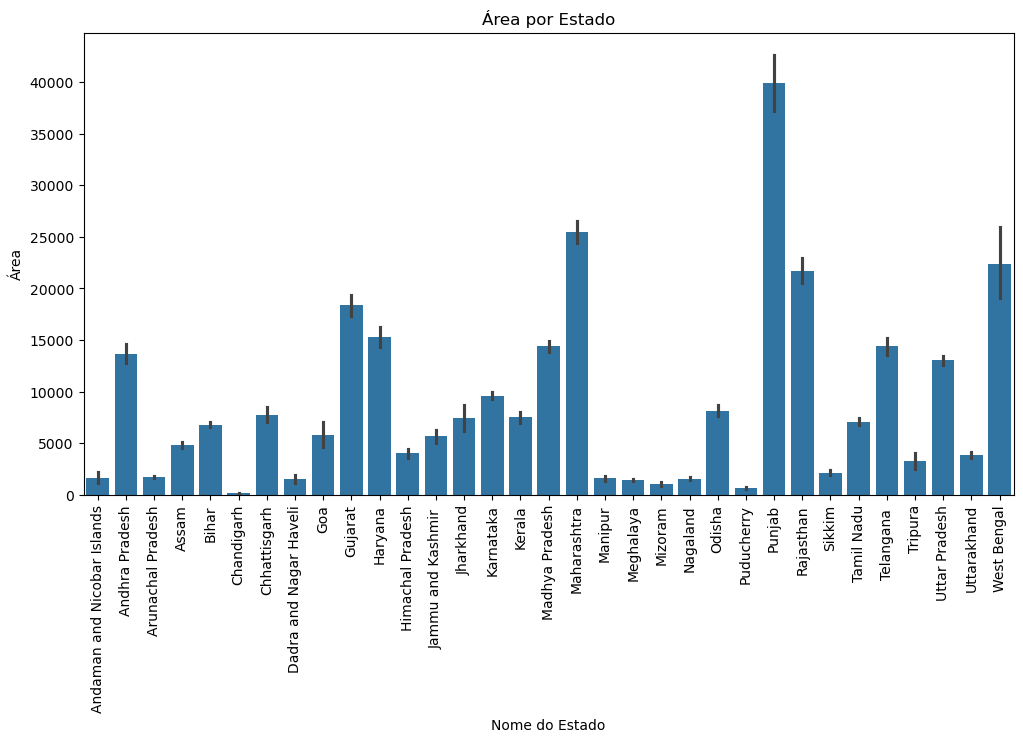

In [25]:
#Área por estado
plt.figure(figsize=(12,6))
sns.barplot(x='State_Name', y='Area', data=df)
plt.xticks(rotation=90)
plt.title('Área por Estado')
plt.xlabel('Nome do Estado')
plt.ylabel('Área')
plt.show()          

In [26]:
#correlação de variáveis
numeric_df = df.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numeric_df.corr()
print(correlation_matrix)

            Crop_Year      Area  Production
Crop_Year    1.000000 -0.026022    0.006989
Area        -0.026022  1.000000    0.040587
Production   0.006989  0.040587    1.000000


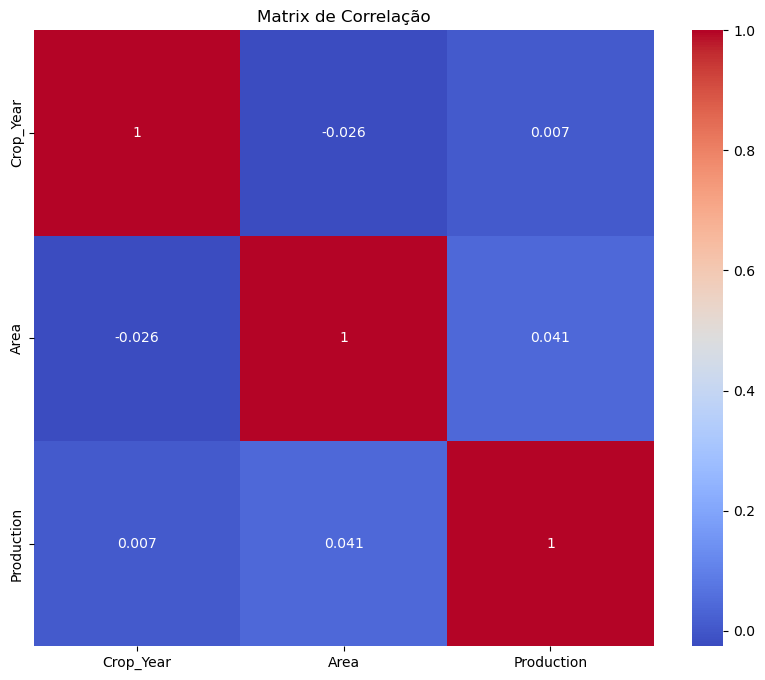

In [27]:
#heatmap de correlação
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matrix de Correlação')
plt.show()

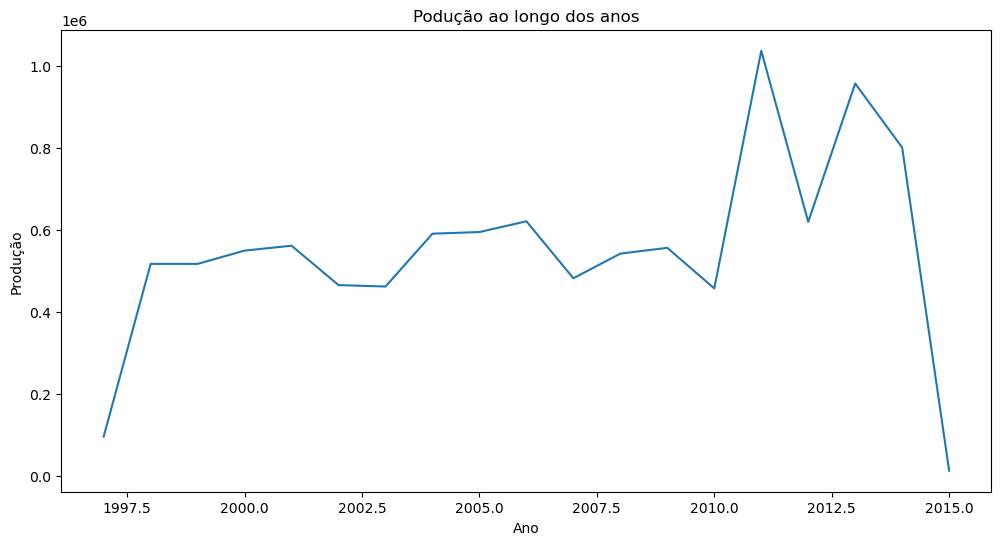

In [30]:
#Produção ao longo dos anos
plt.figure(figsize=(12,6))
sns.lineplot(x='Crop_Year', y='Production', data=df, errorbar=None)
plt.title('Podução ao longo dos anos')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.show()

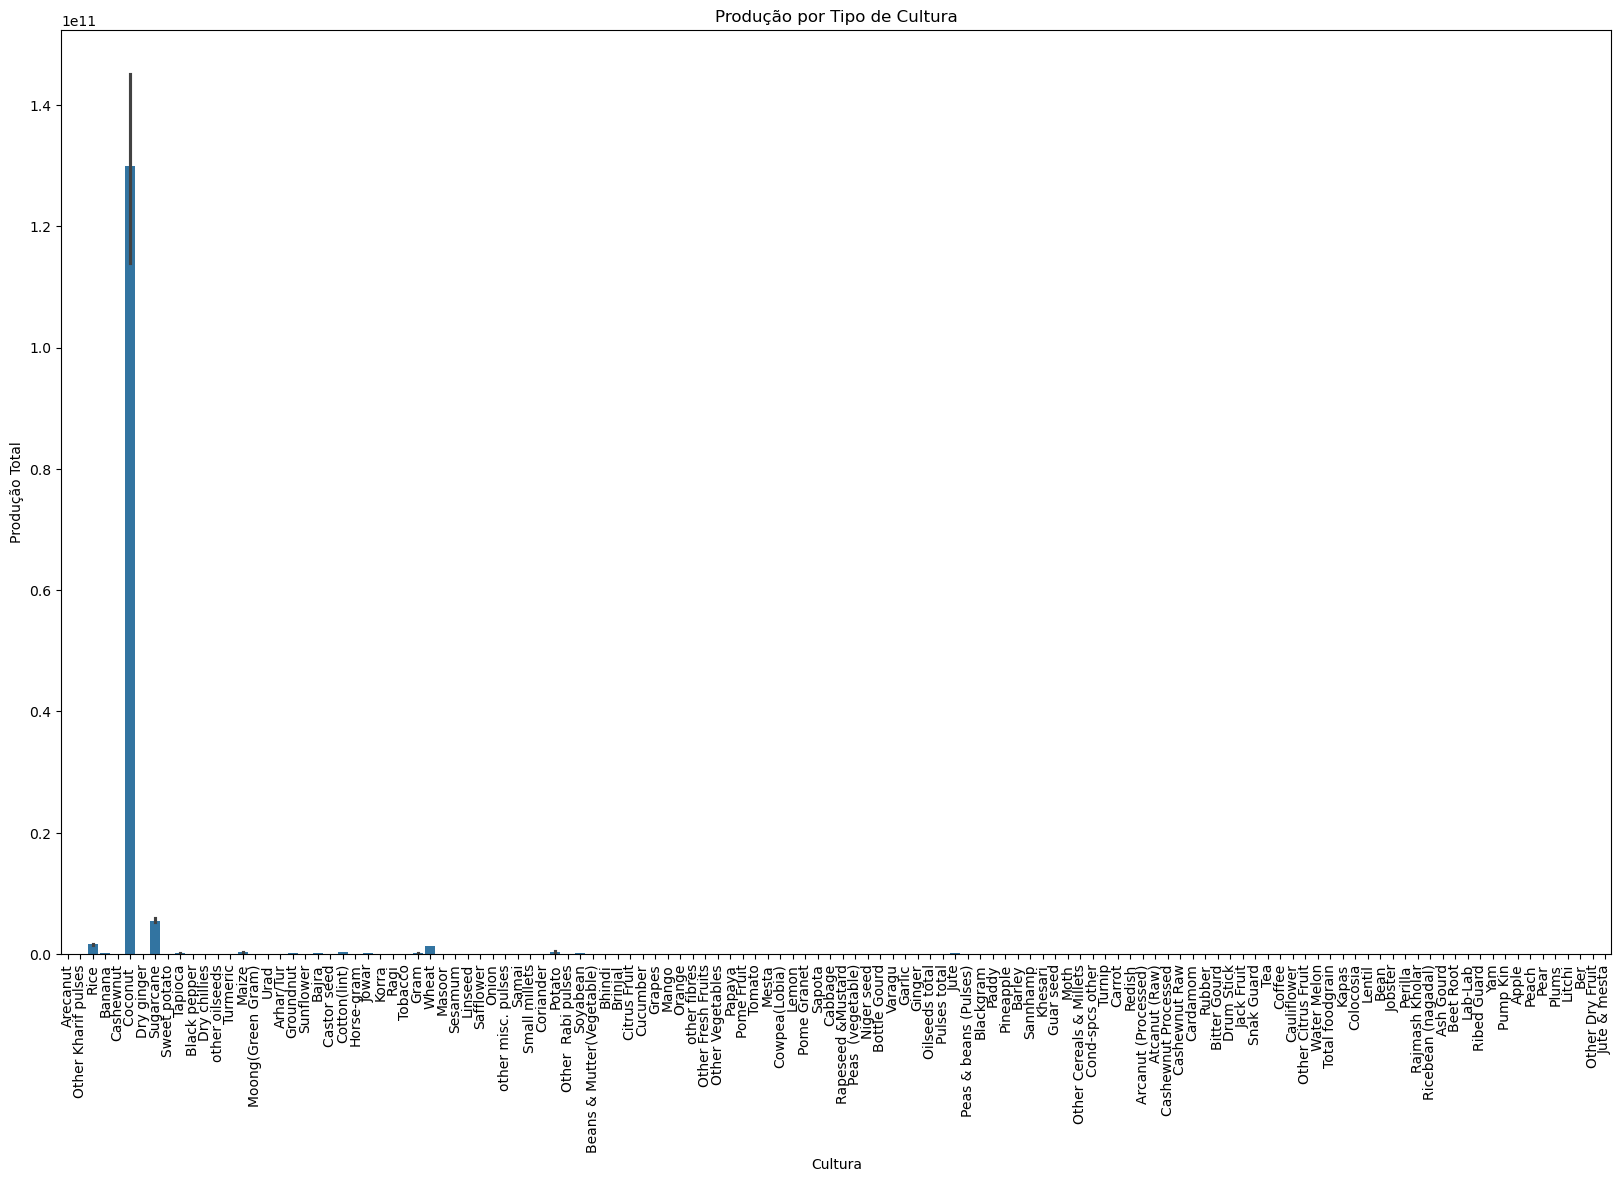

In [60]:
#Produção por tipo de cultura (Gráfico em barras)
df = df.dropna()
plt.figure(figsize=(20,12))
sns.barplot(x='Crop', y='Production', data=df, estimator=sum)
plt.xticks(rotation=90)
plt.title('Produção por Tipo de Cultura')
plt.xlabel('Cultura')
plt.ylabel('Produção Total')
plt.show()

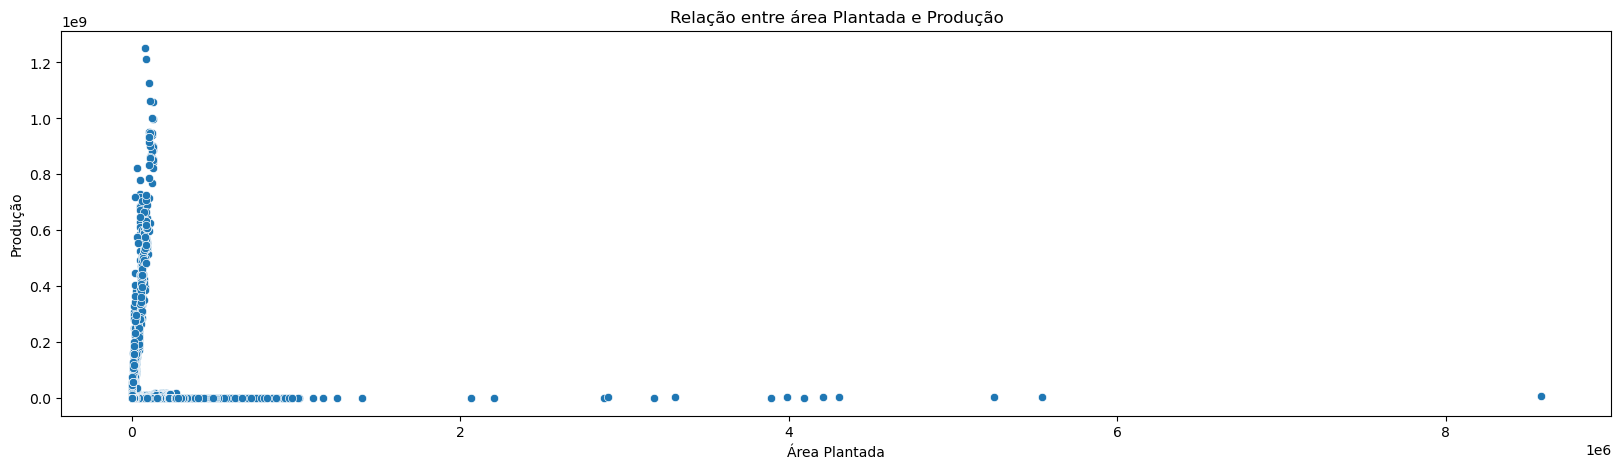

In [58]:
#Gráfico de dispersão da área plantada versus produçpão
df = df.dropna()
plt.figure(figsize=(20,5))
sns.scatterplot(x='Area', y='Production', data=df)
plt.title('Relação entre área Plantada e Produção')
plt.xlabel('Área Plantada')
plt.ylabel('Produção')
plt.show()

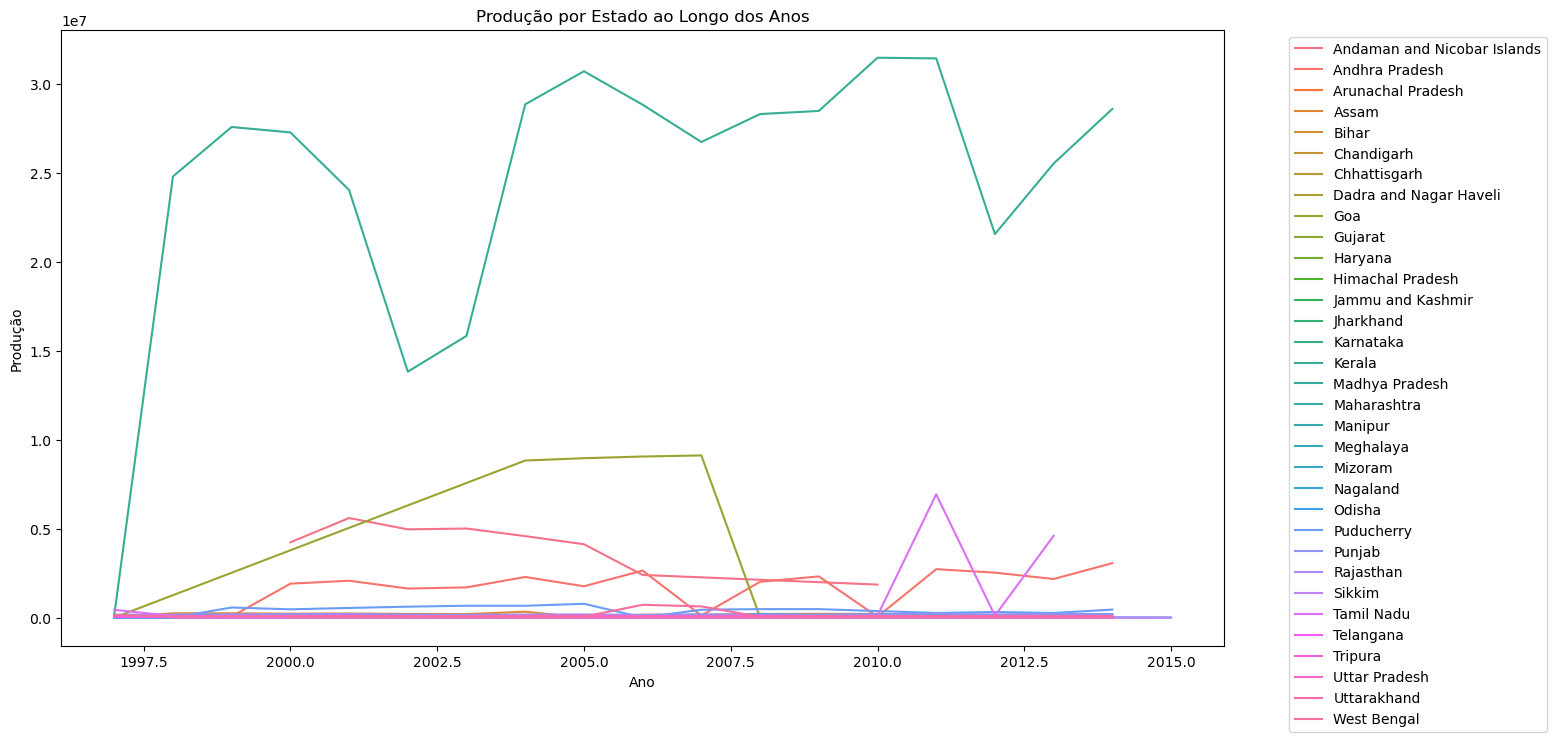

In [59]:
# Gráfico de linha da produção por estado ao longo dos anos
plt.figure(figsize=(15,8))
sns.lineplot(x='Crop_Year', y='Production', hue='State_Name', data=df, errorbar=None)
plt.title('Produção por Estado ao Longo dos Anos')
plt.xlabel('Ano')
plt.ylabel('Produção')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


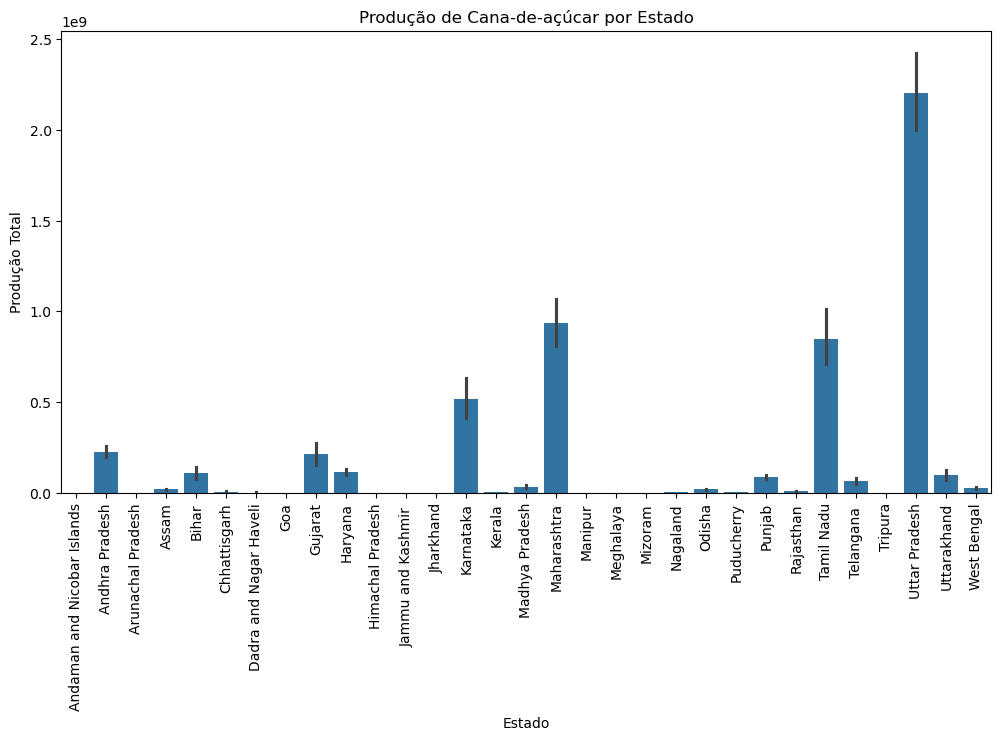

In [45]:
# Filtrar dados para uma cultura específica (por exemplo, 'Rice')
cultura_especifica = df[df['Crop'] == 'Sugarcane']

# Gráfico de barras da produção de arroz por estado
plt.figure(figsize=(12,6))
sns.barplot(x='State_Name', y='Production', data=cultura_especifica, estimator=sum)
plt.xticks(rotation=90)
plt.title('Produção de Cana-de-açúcar por Estado')
plt.xlabel('Estado')
plt.ylabel('Produção Total')
plt.show()


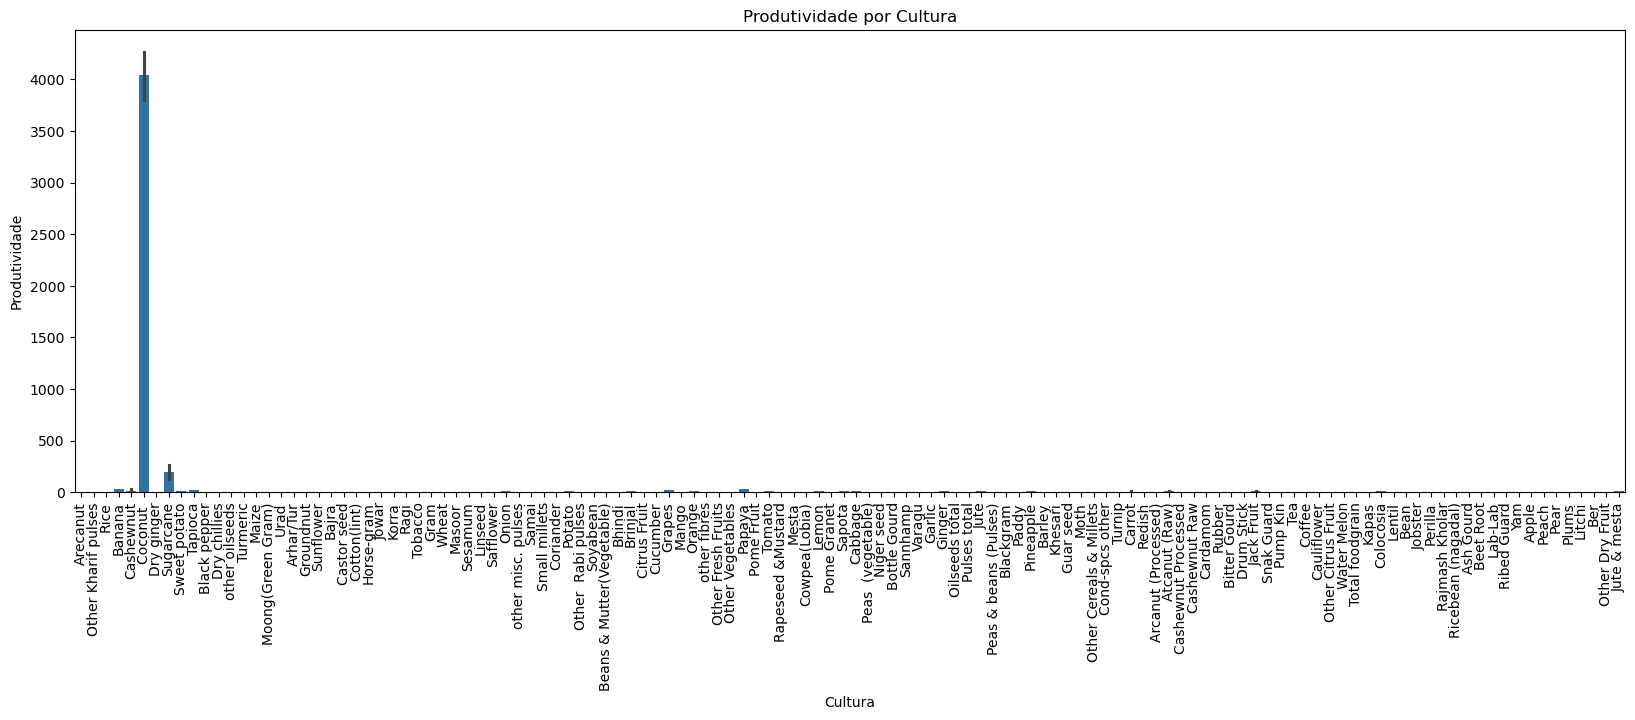

In [47]:
# Calcular a produtividade
df['Produtividade'] = df['Production'] / df['Area']

# Gráfico de barras da produtividade por cultura
plt.figure(figsize=(20,6))
sns.barplot(x='Crop', y='Produtividade', data=df)
plt.xticks(rotation=90)
plt.title('Produtividade por Cultura')
plt.xlabel('Cultura')
plt.ylabel('Produtividade')
plt.show()


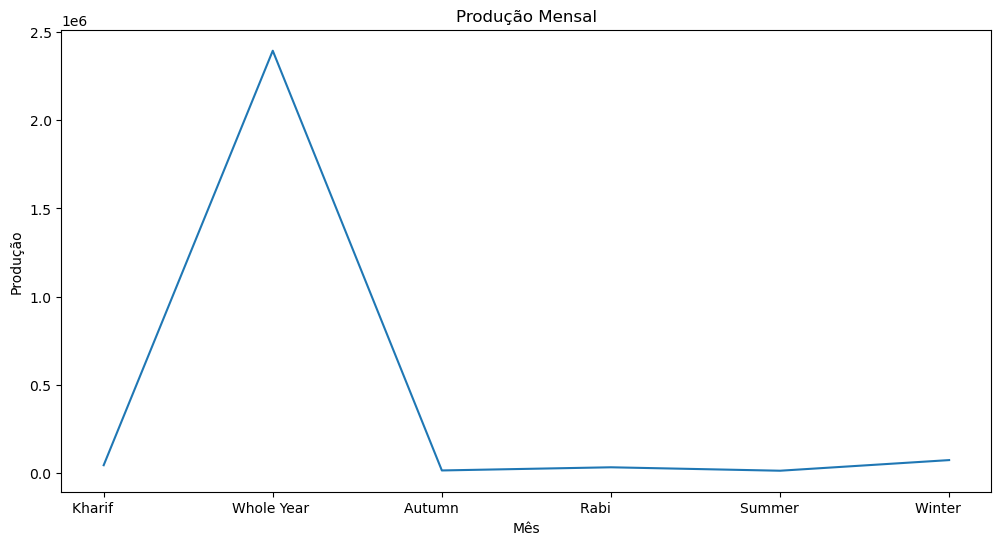

In [54]:
# Supondo que haja uma coluna 'Month' no dataset
# Gráfico de linha da produção mensal
plt.figure(figsize=(12,6))
sns.lineplot(x='Season', y='Production', data=df, errorbar=None)
plt.title('Produção Mensal')
plt.xlabel('Mês')
plt.ylabel('Produção')
plt.show()
